In [140]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# lecture du dataset

In [60]:
df = pd.read_csv('SPAM text message 20170820 - Data.csv')

In [82]:
df['Category'].replace({'ham': 1, 'spam':0},inplace=True)

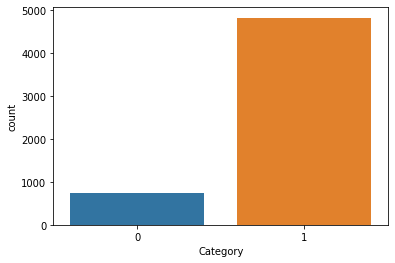

In [141]:
sns.countplot(x='Category', data=df)

In [84]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


# Repartition entrainment test

In [85]:
print(len(df))
5572-557

5572


5015

In [86]:
test = df.iloc[5015:]
train = df.iloc[:5015]

# Tokenization

In [87]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [88]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")

In [89]:
tokenizer.fit_on_texts(train['Message'])

In [ ]:
word_index = tokenizer.word_index
word_index

# Conversion en sequence

In [91]:
train_sequences = tokenizer.texts_to_sequences(train['Message'])
test_sequences = tokenizer.texts_to_sequences(test['Message'])

In [92]:
print(train_sequences)

[[51, 438, 4124, 833, 778, 607, 67, 10, 1392, 87, 125, 326, 1393, 138, 2792, 1230, 69, 58, 4125, 147], [47, 347, 2173, 461, 7, 2174], [52, 513, 10, 21, 5, 834, 1024, 3, 174, 1792, 1025, 662, 1793, 2175, 253, 2176, 70, 1792, 3, 1794, 3, 332, 513, 561, 956, 74, 413, 190, 663, 414, 2793], [7, 246, 148, 24, 348, 2794, 7, 137, 156, 59, 148], [957, 2, 96, 111, 72, 462, 3, 898, 72, 1795, 213, 112, 482], [730, 129, 69, 1796, 155, 101, 169, 2795, 22, 8, 39, 314, 93, 1026, 56, 120, 396, 4, 44, 13, 15, 86, 2177, 47, 359, 956, 4126, 3, 68, 315, 244, 3, 2796], [214, 12, 664, 9, 25, 56, 3, 367, 36, 11, 106, 731, 11, 56, 4127, 4128], [73, 242, 14, 1231, 2178, 2179, 1797, 2180, 2181, 2182, 835, 121, 101, 608, 73, 14, 958, 13, 49, 1562, 779, 463, 3, 1027, 14, 247, 958], [665, 73, 5, 836, 425, 235, 4, 18, 101, 426, 3, 2797, 1232, 154, 1113, 3, 133, 17, 2798, 133, 439, 2799, 533, 1028, 609, 67], [143, 14, 103, 732, 959, 27, 134, 7, 84, 1563, 3, 534, 3, 6, 368, 610, 960, 36, 386, 13, 52, 17, 6, 103, 534, 

# Padding

In [93]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [94]:
max_length = max([len(x) for x in train['Message']])
print(max_length)

910


In [147]:
train_padded = pad_sequences(train_sequences, maxlen=200,padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=200,padding='post', truncating='post')

In [145]:
train_padded[15]

array([2806,    3,  275,   14,  783, 1233,    6,  900, 1116,   10,    6,
        225,   74,  144,   27, 1233,  112,  583,  900, 2806,  180,   87,
       4138,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

# Creation du modele

In [104]:
from tensorflow.keras.models import Sequential

In [120]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, GlobalAveragePooling1D, GlobalAveragePooling2D

In [136]:
model = Sequential()
model.add(Embedding(10000,output_dim=16, input_length=200))
#model.add(LSTM(50, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

In [137]:
model.fit(train_padded, train['Category'], epochs=20, validation_data=(test_padded, test['Category']) )

Epoch 1/20
157/157 [==============================] - 1s 5ms/step - loss: 0.6063 - val_loss: 0.3698
Epoch 2/20
157/157 [==============================] - 1s 5ms/step - loss: 0.3761 - val_loss: 0.3555
Epoch 3/20
157/157 [==============================] - 1s 4ms/step - loss: 0.3721 - val_loss: 0.3406
Epoch 4/20
157/157 [==============================] - 1s 5ms/step - loss: 0.3396 - val_loss: 0.3137
Epoch 5/20
157/157 [==============================] - 1s 4ms/step - loss: 0.3090 - val_loss: 0.2441
Epoch 6/20
157/157 [==============================] - 1s 5ms/step - loss: 0.2183 - val_loss: 0.1394
Epoch 7/20
157/157 [==============================] - 1s 4ms/step - loss: 0.1195 - val_loss: 0.0894
Epoch 8/20
157/157 [==============================] - 1s 5ms/step - loss: 0.0784 - val_loss: 0.0710
Epoch 9/20
157/157 [==============================] - 1s 4ms/step - loss: 0.0610 - val_loss: 0.0569
Epoch 10/20
157/157 [==============================] - 1s 4ms/step - loss: 0.0481 - val_loss: 0.0509

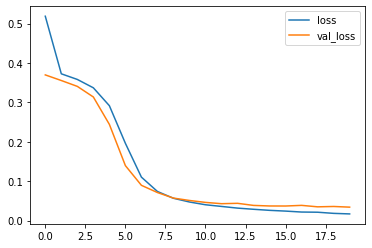

In [138]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# verification

In [156]:
test['prediction']=model.predict(test_padded)
test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Category,Message,prediction
5015,1,Hello boytoy ! Geeee ... I'm missing you today...,0.996845
5016,1,I think the other two still need to get cash b...,0.999533
5017,1,Hey gals...U all wanna meet 4 dinner at nìte?,0.995057
5018,0,Dear 0776xxxxxxx U've been invited to XCHAT. T...,0.000216
5019,1,Babe ! What are you doing ? Where are you ? Wh...,0.997886
...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,0.000127
5568,1,Will ü b going to esplanade fr home?,0.998612
5569,1,"Pity, * was in mood for that. So...any other s...",0.994892
5570,1,The guy did some bitching but I acted like i'd...,0.999541


In [182]:
print(test)

      Category                                            Message  prediction
5015         1  Hello boytoy ! Geeee ... I'm missing you today...    0.996845
5016         1  I think the other two still need to get cash b...    0.999533
5017         1      Hey gals...U all wanna meet 4 dinner at nìte?    0.995057
5018         0  Dear 0776xxxxxxx U've been invited to XCHAT. T...    0.000216
5019         1  Babe ! What are you doing ? Where are you ? Wh...    0.997886
...        ...                                                ...         ...
5567         0  This is the 2nd time we have tried 2 contact u...    0.000127
5568         1               Will ü b going to esplanade fr home?    0.998612
5569         1  Pity, * was in mood for that. So...any other s...    0.994892
5570         1  The guy did some bitching but I acted like i'd...    0.999541
5571         1                         Rofl. Its true to its name    0.992249

[557 rows x 3 columns]


In [183]:
sentence = [
            "hi Lea, i just wanted to say that you are the pretiest girl",
            " your attention is needed, you have receive a message from the following numer : 05 12 47 84, clic on this link to open"
]

sequence = tokenizer.texts_to_sequences(sentence)
padded_sentence = pad_sequences(sequence,maxlen=200, padding='post', truncating='post')

In [184]:
print(model.predict(padded_sentence))

[[0.994673 ]
 [0.0218789]]
